<a href="https://colab.research.google.com/github/Abimathi03/Used-Car-Price-Prediction-Keras/blob/main/Used_Car_Price_Prediction_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv("/content/pre-owned cars.csv")  # Update path if needed
df.head()

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


In [ ]:
# Drop missing or irrelevant data
df = df.dropna()
df = df[df['price'] > 100]  # Remove invalid prices
# Define features and target
X = df.drop("price", axis=1)
y = df["price"]
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit and transform
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Regression output
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       118,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,233 (497.00 KB)

 Trainable params: 127,233 (497.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_transformed, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 508221489152.0000 - mae: 632008.4375 - val_loss: 463736897536.0000 - val_mae: 608485.1250
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 537479544832.0000 - mae: 646902.4375 - val_loss: 463732965376.0000 - val_mae: 608482.0000
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 518296436736.0000 - mae: 639766.0625 - val_loss: 463723757568.0000 - val_mae: 608475.1250
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 518120144896.0000 - mae: 640141.5625 - val_loss: 463704588288.0000 - val_mae: 608460.6875
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 546345549824.0000 - mae: 657781.3125 - val_loss: 463670116352.0000 - val_mae: 608435.0000
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 531364052992.0000 - mae: 647038.3125 - val_loss: 463615229952.0000 - val_mae: 608393.9375
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 562921734144.0000 - mae: 662543.1875 - val_loss

In [ ]:
y_pred = model.predict(X_test_transformed).flatten()
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 577337.6875
MSE: 409740050432.0
R2 Score: -3.715825080871582


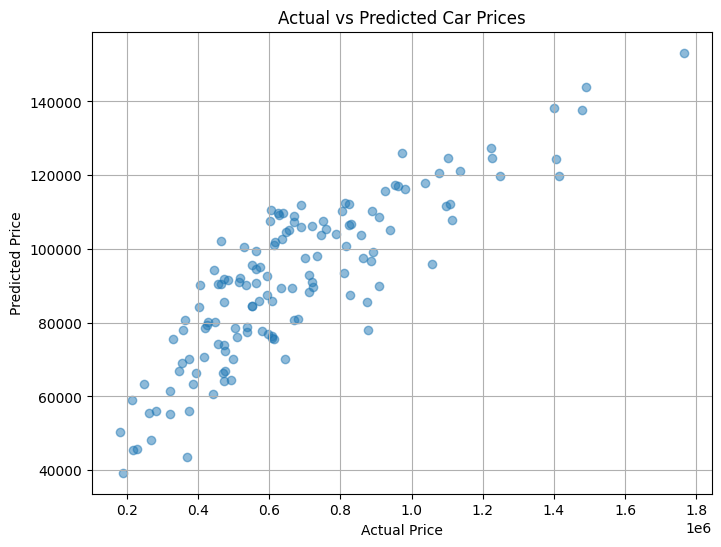

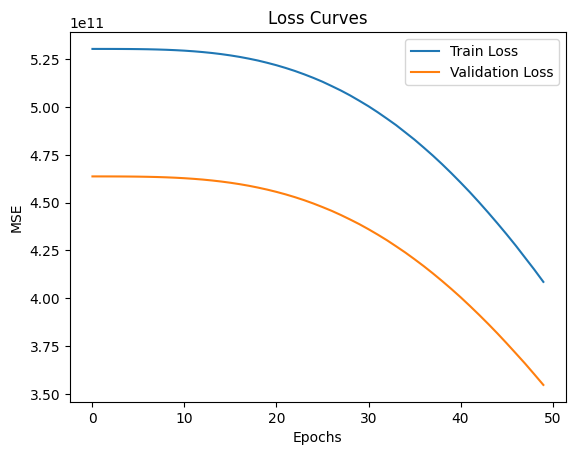

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()
# Loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()